In [1]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
print(faces_all.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/uk/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some si

In [20]:
K = 30   # ID가 20번인 사람
faces = faces_all.images[faces_all.target == K]

In [21]:
faces

array([[[0.47107437, 0.5082645 , 0.5123967 , ..., 0.54545456,
         0.5289256 , 0.53305787],
        [0.46694216, 0.5082645 , 0.5165289 , ..., 0.5371901 ,
         0.5289256 , 0.53305787],
        [0.46694216, 0.5041322 , 0.5206612 , ..., 0.53305787,
         0.5289256 , 0.5247934 ],
        ...,
        [0.6528926 , 0.6528926 , 0.59504133, ..., 0.38016528,
         0.4338843 , 0.47107437],
        [0.69008267, 0.6818182 , 0.59090906, ..., 0.4752066 ,
         0.5289256 , 0.55785125],
        [0.6570248 , 0.6859504 , 0.607438  , ..., 0.4752066 ,
         0.45041323, 0.4338843 ]],

       [[0.6983471 , 0.78099173, 0.8057851 , ..., 0.58264464,
         0.6198347 , 0.5206612 ],
        [0.72727275, 0.8057851 , 0.8016529 , ..., 0.59090906,
         0.6363636 , 0.553719  ],
        [0.78512394, 0.8181818 , 0.822314  , ..., 0.59917355,
         0.6446281 , 0.58264464],
        ...,
        [0.5123967 , 0.5041322 , 0.54545456, ..., 0.446281  ,
         0.6528926 , 0.62396693],
        [0.5

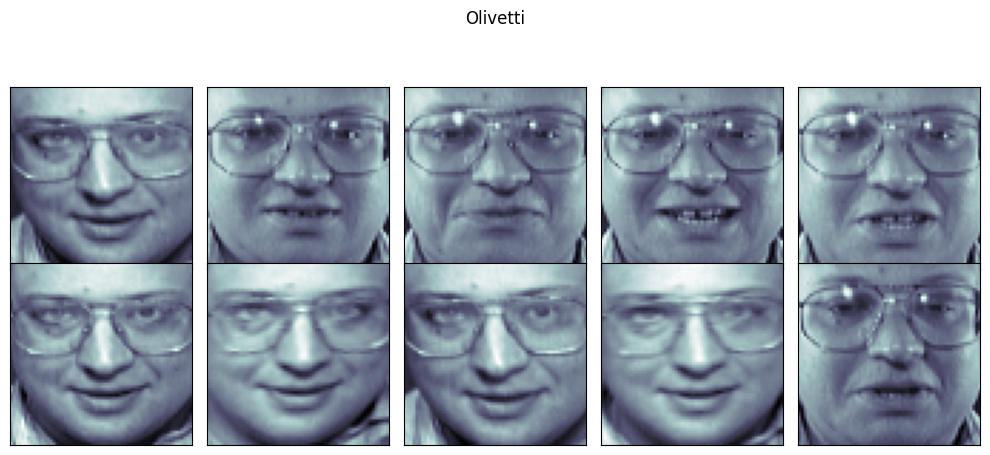

In [22]:
import matplotlib.pyplot as plt

N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1,bottom=0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle("Olivetti")
plt.tight_layout()
plt.show()

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = faces_all.data[faces_all.target == K]
W = pca.fit_transform(X)

X_inv = pca.inverse_transform(W)

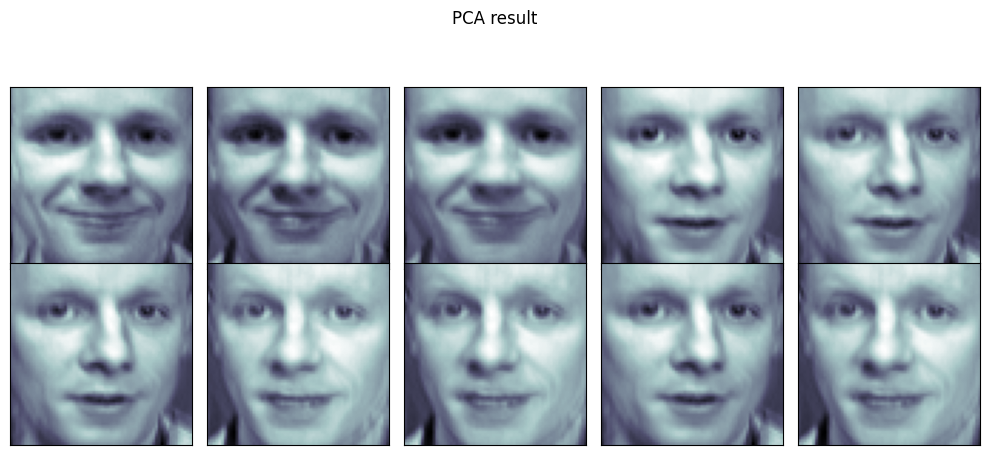

In [8]:
N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top= 1, bottom=0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(X_inv[n].reshape(64,64), cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle("PCA result")
plt.tight_layout()
plt.show()

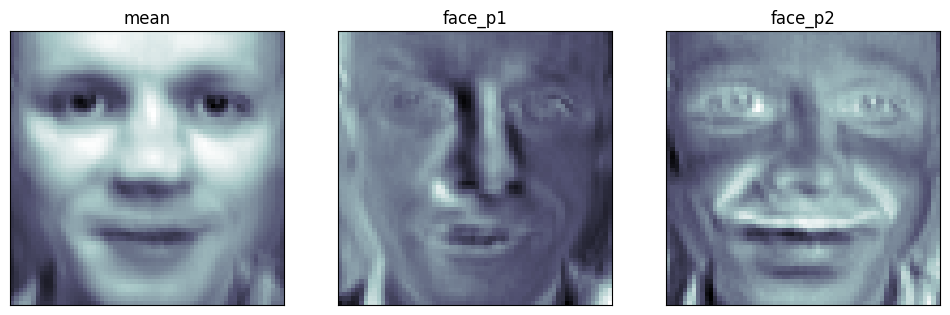

In [9]:
face_mean = pca.mean_.reshape(64,64)
face_p1 = pca.components_[0].reshape(64,64)
face_p2 = pca.components_[1].reshape(64,64)

plt.figure(figsize=(12,7))
plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]);plt.yticks([]);plt.title("mean")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]);plt.yticks([]);plt.title("face_p1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]);plt.yticks([]);plt.title("face_p2")
plt.show()

In [10]:
import numpy as np

N = 2
M = 5
W = np.linspace(-5,10,N*M)
W

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

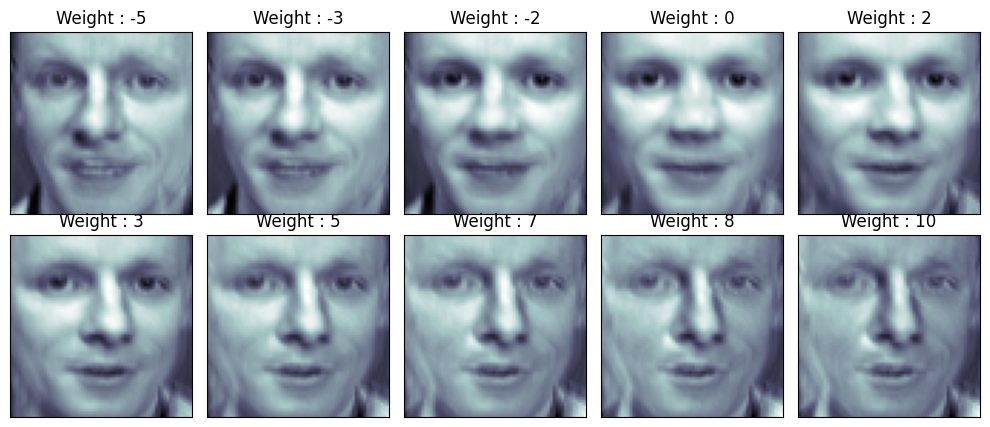

In [12]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + W[n] * face_p1, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('Weight : ' + str(round(W[n])))

plt.tight_layout()
plt.show()

In [13]:
nx, ny = (5,5)
x = np.linspace(-5, 8, nx)
y = np.linspace(-5, 8 ,ny)
w1, w2 = np.meshgrid(x,y)
w1, w2


(array([[-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ]]),
 array([[-5.  , -5.  , -5.  , -5.  , -5.  ],
        [-1.75, -1.75, -1.75, -1.75, -1.75],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ],
        [ 4.75,  4.75,  4.75,  4.75,  4.75],
        [ 8.  ,  8.  ,  8.  ,  8.  ,  8.  ]]))

In [14]:
w1.shape

(5, 5)

In [15]:
w1 = w1.reshape(-1,)
w2 = w2.reshape(-1,)
w1.shape

(25,)

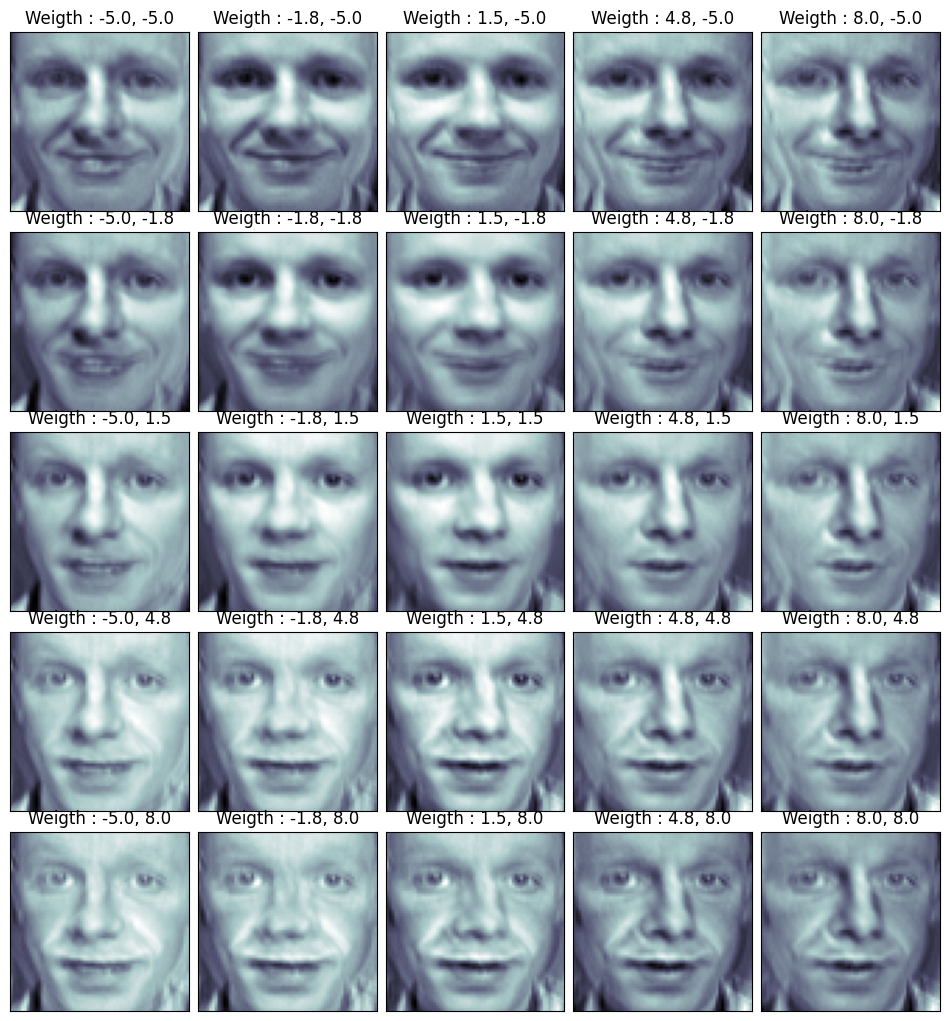

In [16]:
fig = plt.figure(figsize=(12,10))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

N=5
M=5

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(face_mean + w1[n] * face_p1 + w2[n] * face_p2, cmap = plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('Weigth : ' + str(round(w1[n],1))+ ', '+ str(round(w2[n], 1)))
plt.show()